In [1]:
# import the external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import discriminant_analysis
from sklearn.utils import shuffle
import xgboost as xgb

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')
data = shuffle(data)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92694,64050.0,-0.342965,1.129427,1.295468,0.063182,0.032407,-0.987297,0.708349,-0.072981,-0.394873,...,-0.263687,-0.689173,-0.015164,0.334335,-0.160667,0.071863,0.245684,0.098338,2.78,0
169637,119790.0,1.886682,-0.366242,-1.278010,0.179013,0.608319,0.871761,-0.255284,0.357533,0.756237,...,-0.196763,-0.350107,0.467873,-1.498470,-0.642714,0.338696,-0.008925,-0.079498,0.89,0
207119,136527.0,-0.554362,0.262527,0.887434,-2.319932,0.281702,-0.910903,0.668582,-0.186910,-1.679894,...,0.073716,0.053812,-0.418959,0.033832,0.901959,-0.267563,-0.238776,-0.098915,12.00,0
91396,63450.0,-1.703821,1.551985,1.119264,0.660052,-0.520393,0.728423,-0.629305,1.213827,-0.683427,...,0.443310,1.090413,-0.081961,-0.264246,-0.117950,-0.181064,-0.210228,0.012316,2.37,0
227969,145304.0,0.071854,0.827823,-0.129191,-0.959345,1.041935,-0.158798,0.948454,-0.032640,-0.338326,...,-0.269483,-0.600405,-0.075542,-1.086191,-0.349711,0.185346,0.245183,0.078071,7.16,0


# 1. EDA

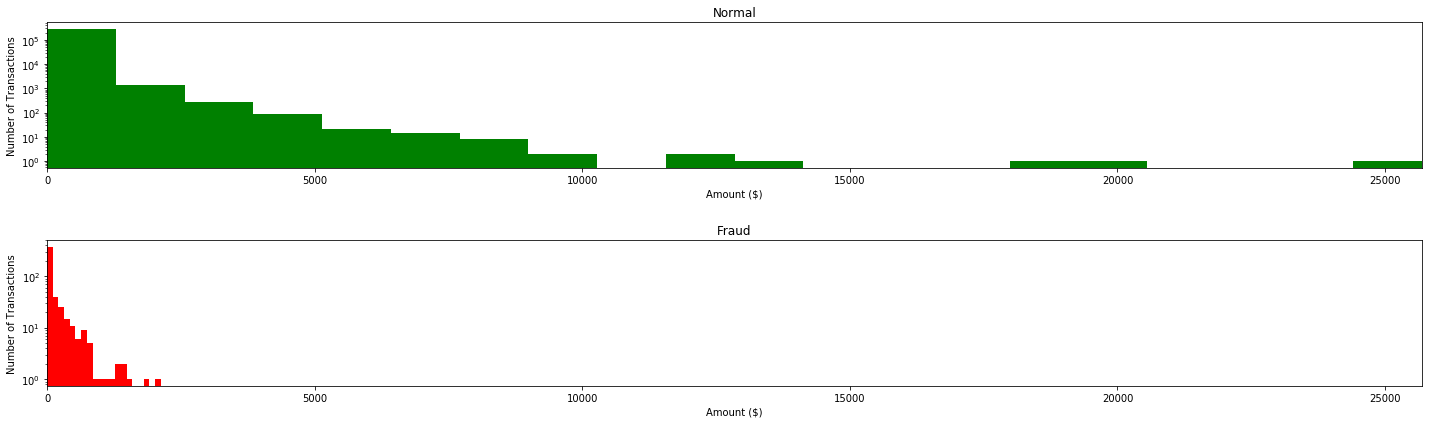

In [52]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=(20,6))
max_amount = max(data["Amount"][data["Class"] == 0])
bins = 20

plt.subplot(211)
plt.hist(data["Amount"][data["Class"] == 0], color='g',bins = bins)
plt.title('Normal')
plt.xlim(0, max_amount)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')

plt.subplot(212)
plt.hist(data["Amount"][data["Class"]== 1],color='r',bins = bins)
plt.title('Fraud')
plt.xlim(0, max_amount)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')


fig.tight_layout()
plt.subplots_adjust(wspace =0, hspace =0.5)
plt.savefig("EDA1.png")
plt.show()

Normal:

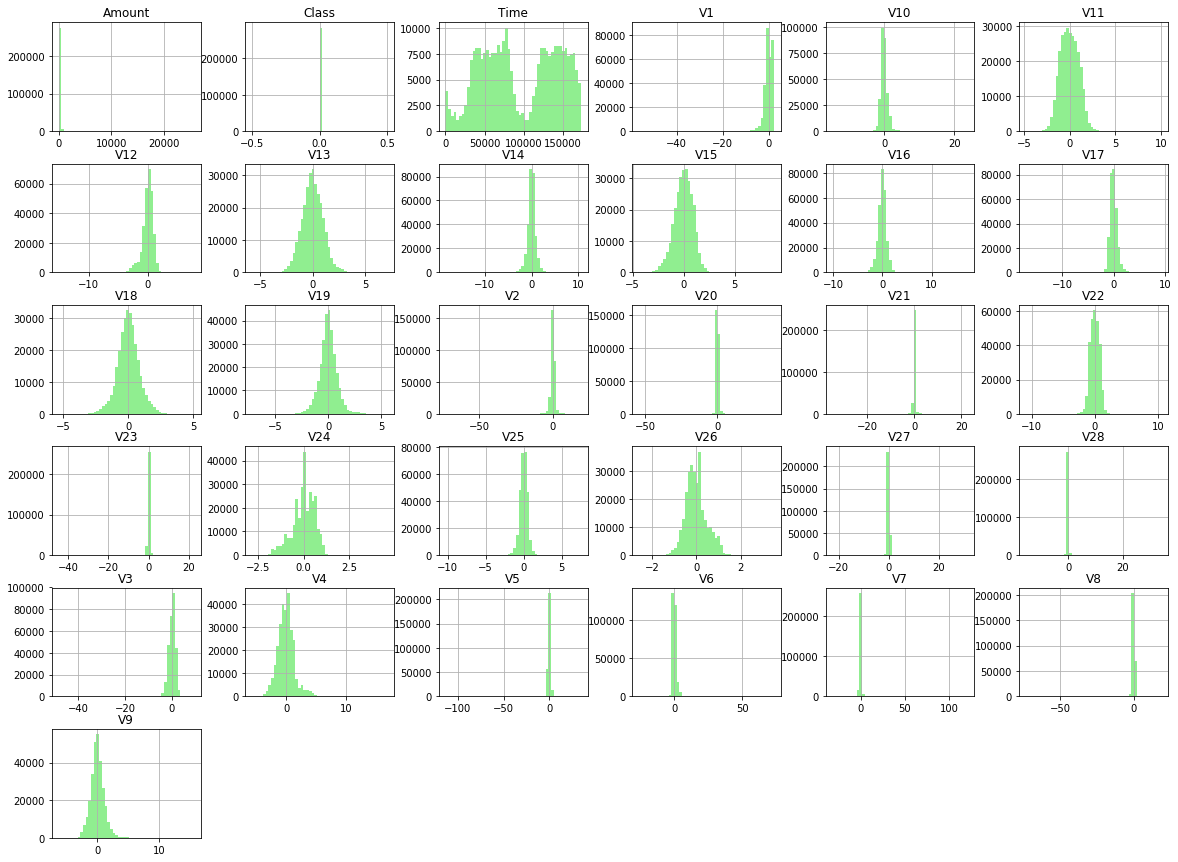

In [53]:
data[data["Class"] == 0].hist (bins=50, figsize=(20,15), color = 'lightgreen')
plt.savefig("normal distribution.png")
plt.show()

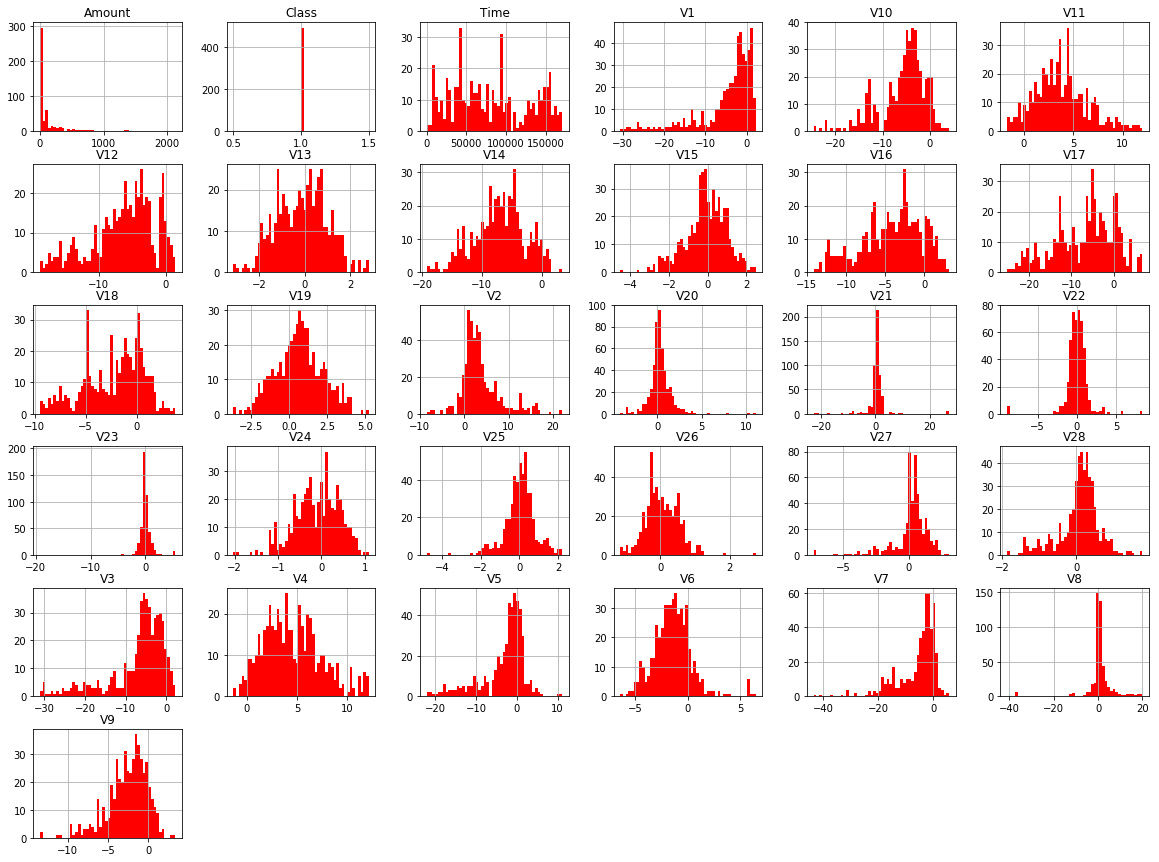

In [54]:
data[data["Class"] == 1].hist (bins=50, figsize=(20,15), color = 'red')
plt.savefig("fraud distribution.png")
plt.show()

# 2.Data Transformation

In [3]:
features = ['V%d' % number for number in range(1, 29)] 
# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'
new_features = ['Amount','Time']
sc =StandardScaler() 
data[new_features] =sc.fit_transform(data[new_features])
# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features+new_features]
Y = data[target]

In [4]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time
92694,-0.342965,1.129427,1.295468,0.063182,0.032407,-0.987297,0.708349,-0.072981,-0.394873,-0.510889,...,-0.263687,-0.689173,-0.015164,0.334335,-0.160667,0.071863,0.245684,0.098338,-0.342115,-0.647823
169637,1.886682,-0.366242,-1.278010,0.179013,0.608319,0.871761,-0.255284,0.357533,0.756237,-0.074278,...,-0.196763,-0.350107,0.467873,-1.498470,-0.642714,0.338696,-0.008925,-0.079498,-0.349671,0.525946
207119,-0.554362,0.262527,0.887434,-2.319932,0.281702,-0.910903,0.668582,-0.186910,-1.679894,-0.027595,...,0.073716,0.053812,-0.418959,0.033832,0.901959,-0.267563,-0.238776,-0.098915,-0.305252,0.878392
91396,-1.703821,1.551985,1.119264,0.660052,-0.520393,0.728423,-0.629305,1.213827,-0.683427,-0.163281,...,0.443310,1.090413,-0.081961,-0.264246,-0.117950,-0.181064,-0.210228,0.012316,-0.343754,-0.660458
227969,0.071854,0.827823,-0.129191,-0.959345,1.041935,-0.158798,0.948454,-0.032640,-0.338326,-0.264783,...,-0.269483,-0.600405,-0.075542,-1.086191,-0.349711,0.185346,0.245183,0.078071,-0.324603,1.063218


# 3. Imbalance Processing

In [5]:
n_sample = Y.shape[0]
n_normal = Y[Y == 0].shape[0]
n_fraud = Y[Y == 1].shape[0]

In [6]:
print('Sample Size: {}; Normal: {:.2%}; Fraud: {:.2%}'.format(n_sample,
                                                   n_normal / n_sample,
                                                   n_fraud  / n_sample))

Sample Size: 284807; Normal: 99.83%; Fraud: 0.17%


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 38)

# oversampling

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

In [9]:
names = X.columns
sm = SMOTE(random_state=38)    
X_train_os, Y_train_os= sm.fit_sample(X_train, Y_train)
X_test_os, Y_test_os= sm.fit_sample(X_test, Y_test)

X_train_os = pd.DataFrame(X_train_os)
X_test_os = pd.DataFrame(X_test_os)
X_train_os.columns = names.tolist()
X_test_os.columns = names.tolist()

index_list_train = X_train_os.index[X_train_os.duplicated()].tolist()
index_list_test = X_test_os.index[X_test_os.duplicated()].tolist()
X_train_os.drop(X_train_os.index[index_list_train],inplace = True)
X_test_os.drop(X_test_os.index[index_list_test],inplace = True)
Y_train_os = np.delete(Y_train_os, index_list_train)
Y_test_os = np.delete(Y_test_os, index_list_test)
n_sample_os = Y_train_os.shape[0]+Y_test_os.shape[0]
n_normal_os = Y_train_os[Y_train_os == 0].shape[0]+Y_test_os[Y_test_os == 0].shape[0]
n_fraud_os = Y_train_os[Y_train_os == 1].shape[0]+Y_test_os[Y_test_os == 1].shape[0]

In [10]:
print('Sample Size: {}; Normal: {:.2%}; Fraud: {:.2%}'.format(n_sample_os,
                                                   n_normal_os / n_sample_os,
                                                   n_fraud_os  / n_sample_os))

Sample Size: 562819; Normal: 50.38%; Fraud: 49.62%


# undersampling

In [11]:
X_train.index = range(len(X_train))
X_test.index = range(len(X_test))
Y_train.index = range(len(Y_train))
Y_test.index = range(len(Y_test))

normal_indices_train = np.array(Y_train[Y_train == 0].index)
normal_indices_test = np.array(Y_test[Y_test == 0].index)
fraud_indices_train = np.array(Y_train[Y_train == 1].index)
fraud_indices_test = np.array(Y_test[Y_test == 1].index)

In [12]:
n_fraud_train = Y_train[Y_train == 1].shape[0]
n_fraud_test = Y_test[Y_test == 1].shape[0]
random_normal_indices_train = np.array(np.random.choice(normal_indices_train,n_fraud_train,replace=False))
random_normal_indices_test = np.array(np.random.choice(normal_indices_test,n_fraud_test,replace=False))

under_sample_indices_train = np.concatenate([fraud_indices_train,random_normal_indices_train])
under_sample_indices_test = np.concatenate([fraud_indices_test,random_normal_indices_test])

X_train_us = X_train.iloc[under_sample_indices_train,:]
X_test_us = X_test.iloc[under_sample_indices_test,:]
Y_train_us = Y_train.iloc[under_sample_indices_train]
Y_test_us = Y_test.iloc[under_sample_indices_test]
X_train_us.index = range(len(X_train_us))
X_test_us.index = range(len(X_test_us))

index_list_train = X_train_us.index[X_train_us.duplicated()].tolist()
index_list_test = X_test_us.index[X_test_us.duplicated()].tolist()
X_train_us = X_train_us.drop(X_train_us.index[index_list_train])
X_test_us = X_test_us.drop(X_test_us.index[index_list_test])

Y_train_us.index = range(len(Y_train_us))
Y_test_us.index = range(len(Y_test_us))
Y_train_us.drop(index_list_train,inplace = True)
Y_test_us.drop(index_list_test,inplace = True)
n_sample_us = Y_train_us.shape[0]+Y_test_us.shape[0]
n_normal_us = Y_train_us[Y_train_us == 0].shape[0]+Y_test_us[Y_test_us == 0].shape[0]
n_fraud_us = Y_train_us[Y_train_us == 1].shape[0]+Y_test_us[Y_test_us == 1].shape[0]

In [13]:
print('Sample Size: {}; Normal: {:.2%}; Fraud: {:.2%}'.format(n_sample_us,
                                                   n_normal_us / n_sample_us,
                                                   n_fraud_us  / n_sample_us))

Sample Size: 969; Normal: 50.77%; Fraud: 49.23%


# 4.Feature Selection

In [14]:
names = X.columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=38)
clf.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=38, verbose=0, warm_start=False)

In [15]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, names[indices[f]], importances[indices[f]]))

 1) V17                            0.176650
 2) V10                            0.121214
 3) V14                            0.105719
 4) V16                            0.104895
 5) V11                            0.102917
 6) V12                            0.061466
 7) V21                            0.026993
 8) V7                             0.022951
 9) V3                             0.021243
10) V4                             0.021139
11) V27                            0.020667
12) V26                            0.019721
13) Time                           0.018898
14) V1                             0.014726
15) V9                             0.013484
16) Amount                         0.012505
17) V22                            0.012133
18) V20                            0.012055
19) V28                            0.011906
20) V5                             0.011764
21) V13                            0.010997
22) V19                            0.010241
23) V15                         

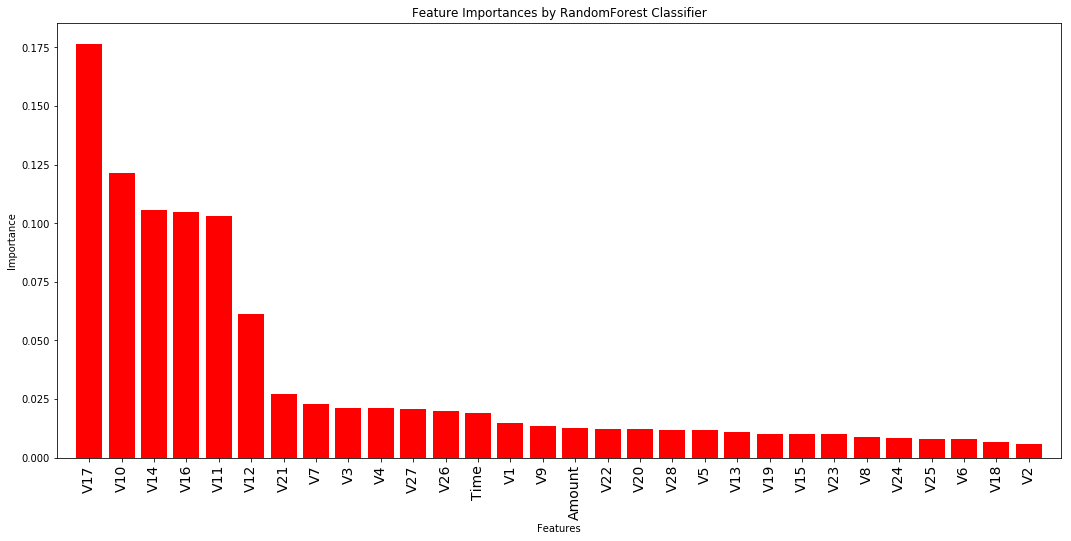

In [16]:
fig = plt.figure(figsize=(18,8))
plt.title("Feature Importances by RandomForest Classifier")
plt.bar(range(len(indices)), importances[indices], color='red',  align="center")
#plt.step(range(len(indices)), np.cumsum(importances[indices]), color='green',where='mid', label='Cumulative')
plt.xticks(range(len(indices)), names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig("feature importance.png")
plt.show()

In [17]:
def feature_selection():
    name_select =[]
    iteration = len(names)
    f1_score_list = []
    for i in range(iteration):
        name_select.append(names[indices][i])
        model = LogisticRegression(solver='lbfgs')
        model.fit(X_train[name_select],Y_train)
        y_pred = model.predict(X_test[name_select])
        f1_score_ = f1_score(Y_test, y_pred)
        f1_score_list.append(f1_score_)
    return f1_score_list

In [18]:
f1_score_list = feature_selection()

In [27]:
index = f1_score_list.index(max(f1_score_list))
index = 10

In [28]:
index

10

In [29]:
name_select=[]
for i in range(index):
        name_select.append(names[indices][i])
print(name_select)

['V17', 'V10', 'V14', 'V16', 'V11', 'V12', 'V21', 'V7', 'V3', 'V4']


# 5. Model

In [137]:
#X_train_os, X_test_os, Y_train_os, Y_test_os = train_test_split(X_OS, Y_OS, test_size = 0.4, random_state = 38)

In [138]:
#X_train_us, X_test_us, Y_train_us, Y_test_us = train_test_split(X_US, Y_US, test_size = 0.4, random_state = 38)

In [139]:
from sklearn.metrics import confusion_matrix
labels=[0,1]
def confusion_matrix_plot(data, labels):
    """
    This function prints and plots the confusion matrix.
    """
    cmap =plt.cm.Greens
    plt.imshow(data, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=0)
    plt.yticks(tick_marks, labels)

    thresh = data.max() / 2.
    for i, j in itertools.product(range(data.shape[0]), range(data.shape[1])):
        plt.text(j, i, data[i, j],
                 horizontalalignment="center",
                 color="white" if data[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

In [140]:
def prc_plot(y,y_pred,y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y,y_pred_prob)
    area = auc(recall, precision)
    f_score = f1_score(y, y_pred)
    plt.title('ROC')
    plt.plot(recall, precision, 'g',label='AUC = %0.5f, F1_score=%f'% (area,f_score))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    
    plt.show()

# Logistic Regression

Oversampling:

In [120]:
param_grid = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000,10000]}

grid_search = GridSearchCV(LogisticRegression(solver='lbfgs',max_iter=3800),  param_grid, cv=5) 
grid_search.fit(X_train_os[name_select], Y_train_os)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3800, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
grid_search.best_params_

{'C': 10}

In [149]:
y_pred = grid_search.predict(X_test_os[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_os, y_pred,)))
y_pred_ = grid_search.predict(X_train_os[name_select])
print("Training set accuracy score: {:.5f}".format(accuracy_score(Y_train_os, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_os, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_os, y_pred_)))
recall = recall_score(Y_test_os, y_pred)
precision = precision_score(Y_test_os, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.93888
Training set accuracy score: 0.93610
Test set F1 score: 0.93638
Training set F1 score: 0.93277
Test set recall: 0.90089, precision:0.97478


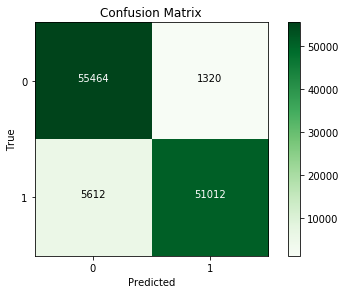

In [150]:
cnf_matrix = confusion_matrix(Y_test_os, y_pred)  
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_log_Over.png")
plt.show()

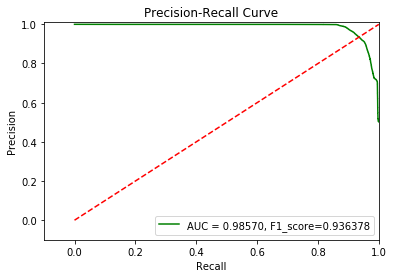

In [151]:
y_pred_prob = grid_search.predict_proba(X_test_os[name_select])[:, 1]
prc_plot(Y_test_os,y_pred,y_pred_prob)

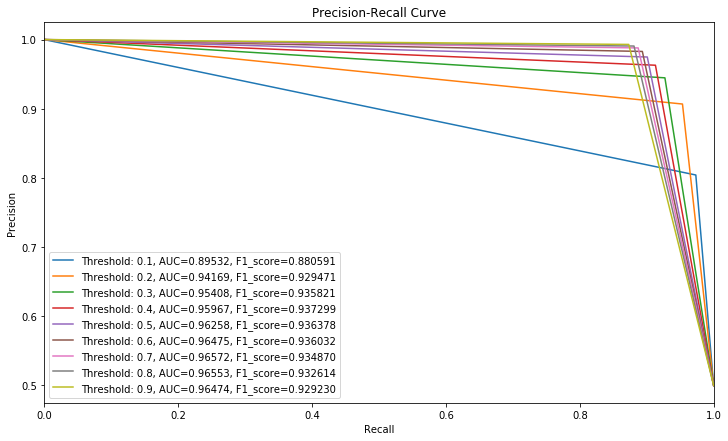

In [152]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(12,7))

for i in thresholds:
    y_test_predictions_prob = y_pred_prob[:] > i   

    precision, recall, thresholds = precision_recall_curve(Y_test_os, y_test_predictions_prob)
    area = auc(recall, precision)
    f_score = f1_score(Y_test_os, y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision,label='Threshold: %s, AUC=%0.5f, F1_score=%f' %(i , area,f_score))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.savefig("PR_Over.png")

Undersampling:

In [153]:
param_grid = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000,10000]}

grid_search = GridSearchCV(LogisticRegression(solver='lbfgs',max_iter=3800),  param_grid, cv=5) 
grid_search.fit(X_train_us[name_select], Y_train_us) 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3800, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
grid_search.best_params_

{'C': 0.1}

In [155]:
y_pred = grid_search.predict(X_test_us[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_us, y_pred,)))
y_pred_ = grid_search.predict(X_train_us[name_select])
print("Training set accuracy score: {:.5f}".format(accuracy_score(Y_train_us, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_us, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_us, y_pred_)))
recall = recall_score(Y_test_us, y_pred)
precision = precision_score(Y_test_us, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.92653
Training set accuracy score: 0.93508
Test set F1 score: 0.92241
Training set F1 score: 0.93078
Test set recall: 0.87705, precision:0.97273


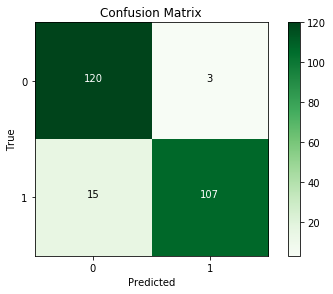

In [156]:
cnf_matrix = confusion_matrix(Y_test_us, y_pred)
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_log_Under.png")
plt.show()

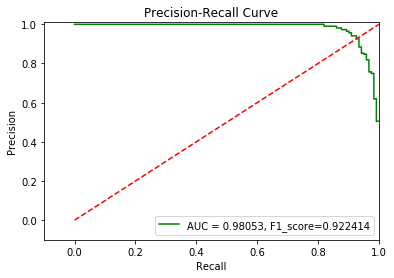

In [157]:
y_pred_prob = grid_search.predict_proba(X_test_us[name_select])[:, 1]
prc_plot(Y_test_us,y_pred,y_pred_prob)

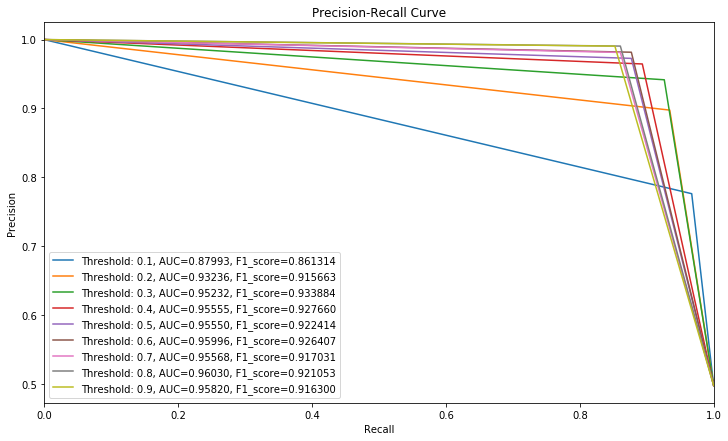

In [158]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(12,7))

for i in thresholds:
    y_test_predictions_prob = y_pred_prob[:] > i  

    precision, recall, thresholds = precision_recall_curve(Y_test_us, y_test_predictions_prob)
    area = auc(recall, precision)
    f_score = f1_score(Y_test_us, y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision,label='Threshold: %s, AUC=%0.5f, F1_score=%f' %(i , area,f_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.savefig("PR_under.png")

# Random Forest

Oversampling:

In [159]:
clf2 = RandomForestClassifier(n_estimators=5,random_state=38)
clf2.fit(X_train_os[name_select], Y_train_os)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=38, verbose=0, warm_start=False)

In [160]:
y_pred = clf2.predict(X_test_os[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_os, y_pred,)))
y_pred_ = clf2.predict(X_train_os[name_select])
print("Training set accuracy score: {:.5f}".format(accuracy_score(Y_train_os, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_os, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_os, y_pred_)))
recall = recall_score(Y_test_os, y_pred)
precision = precision_score(Y_test_os, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.92323
Training set accuracy score: 0.99996
Test set F1 score: 0.91677
Training set F1 score: 0.99996
Test set recall: 0.84674, precision:0.99942


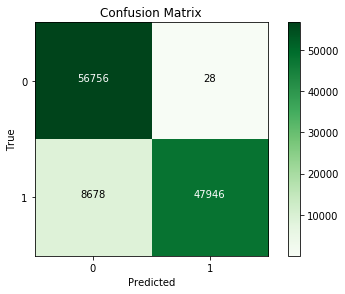

In [162]:
cnf_matrix = confusion_matrix(Y_test_os, y_pred)  
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_RF_Over.png")
plt.show()

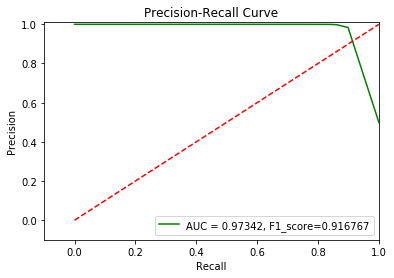

In [163]:
y_pred_prob = clf2 .predict_proba(X_test_os[name_select])[:, 1]
prc_plot(Y_test_os,y_pred,y_pred_prob)

undersampling:

In [164]:
clf2 = RandomForestClassifier(n_estimators=5,random_state=38)
clf2.fit(X_train_us[name_select], Y_train_us)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=38, verbose=0, warm_start=False)

In [165]:
y_pred = clf2.predict(X_test_us[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_us, y_pred,)))
y_pred_ = clf2.predict(X_train_us[name_select])
print("Training set accuracy score: {:.5f}".format(accuracy_score(Y_train_us, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_us, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_us, y_pred_)))
recall = recall_score(Y_test_us, y_pred)
precision = precision_score(Y_test_us, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.92653
Training set accuracy score: 0.98619
Test set F1 score: 0.92500
Training set F1 score: 0.98575
Test set recall: 0.90984, precision:0.94068


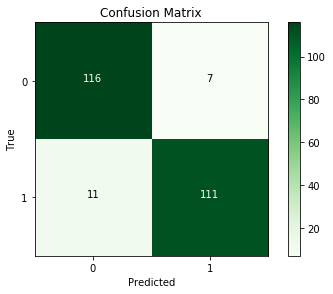

In [166]:
cnf_matrix = confusion_matrix(Y_test_us, y_pred)  
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_RF_Under.png")
plt.show()

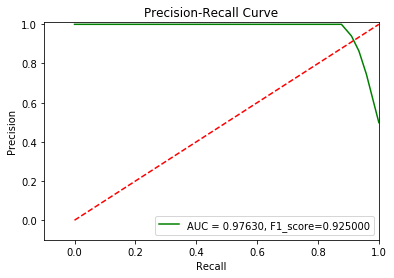

In [167]:
y_pred_prob = clf2 .predict_proba(X_test_us[name_select])[:, 1]
prc_plot(Y_test_us,y_pred,y_pred_prob)

In [168]:
param_grid = {'n_estimators': list(range(1,100,2)) }

grid_search = GridSearchCV(RandomForestClassifier(random_state=38),param_grid,cv=10)
grid_search.fit(X_train_us[name_select], Y_train_us) 

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=38, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [169]:
grid_search.best_params_

{'n_estimators': 67}

In [170]:
y_pred = grid_search.predict(X_test_us[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_us, y_pred,)))
y_pred_ = grid_search.predict(X_train_us[name_select])
print("Training set accuracy score: {:.5f}".format(accuracy_score(Y_train_us, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_us, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_us, y_pred_)))
recall = recall_score(Y_test_us, y_pred)
precision = precision_score(Y_test_us, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.94694
Training set accuracy score: 1.00000
Test set F1 score: 0.94468
Training set F1 score: 1.00000
Test set recall: 0.90984, precision:0.98230


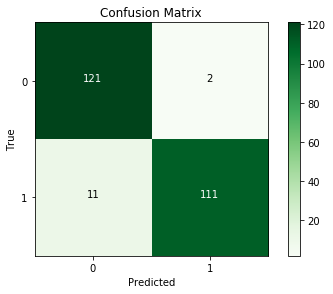

In [171]:
cnf_matrix = confusion_matrix(Y_test_us, y_pred)  
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_RF_Under_After.png")
plt.show()

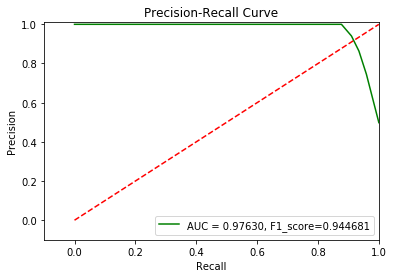

In [172]:
y_pred_prob = clf2 .predict_proba(X_test_us[name_select])[:, 1]
prc_plot(Y_test_us,y_pred,y_pred_prob)

# QDA

oversampling:

In [173]:
clf3= discriminant_analysis.QuadraticDiscriminantAnalysis()
clf3.fit(X_train_os[name_select], Y_train_os)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [174]:
y_pred = clf3.predict(X_test_os[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_os, y_pred,)))
y_pred_ = clf3.predict(X_train_os[name_select])
print("Traininf set accuracy score: {:.5f}".format(accuracy_score(Y_train_os, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_os, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_os, y_pred_)))
recall = recall_score(Y_test_os, y_pred)
precision = precision_score(Y_test_os, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.93373
Traininf set accuracy score: 0.92406
Test set F1 score: 0.93095
Training set F1 score: 0.91941
Test set recall: 0.89464, precision:0.97033


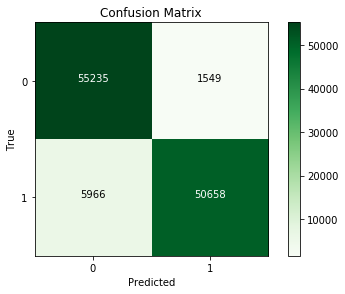

In [175]:
cnf_matrix = confusion_matrix(Y_test_os, y_pred)  
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_QDA_Over.png")
plt.show()

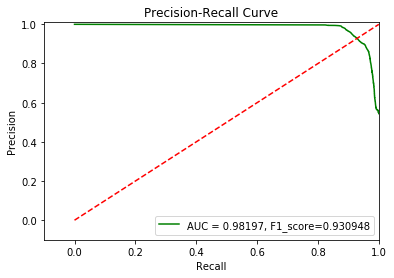

In [176]:
y_pred_prob = clf3 .predict_proba(X_test_os[name_select])[:, 1]
prc_plot(Y_test_os,y_pred,y_pred_prob)

undersampling:

In [177]:
clf3= discriminant_analysis.QuadraticDiscriminantAnalysis()
clf3.fit(X_train_us[name_select], Y_train_us)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [178]:
y_pred = clf3.predict(X_test_us[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_us, y_pred,)))
y_pred_ = clf3.predict(X_train_us[name_select])
print("Training set accuracy score: {:.5f}".format(accuracy_score(Y_train_us, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_us, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_us, y_pred_)))
recall = recall_score(Y_test_us, y_pred)
precision = precision_score(Y_test_us, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.93061
Training set accuracy score: 0.92265
Test set F1 score: 0.92827
Training set F1 score: 0.91789
Test set recall: 0.90164, precision:0.95652


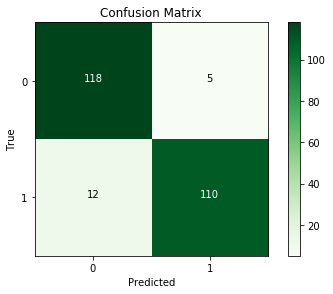

In [179]:
cnf_matrix = confusion_matrix(Y_test_us, y_pred)  
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_QDA_Under.png")
plt.show()

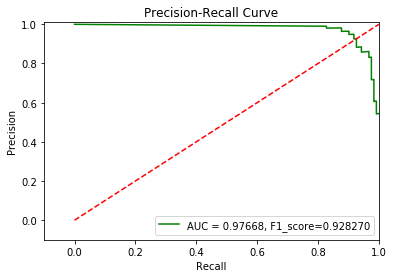

In [180]:
y_pred_prob = clf3 .predict_proba(X_test_us[name_select])[:, 1]
prc_plot(Y_test_us,y_pred,y_pred_prob)

# LDA

Oversampling:

In [181]:
clf4= discriminant_analysis.LinearDiscriminantAnalysis()
clf4.fit(X_train_os[name_select],Y_train_os)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [182]:
y_pred = clf4.predict(X_test_os[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_os, y_pred,)))
y_pred_ = clf4.predict(X_train_os[name_select])
print("Training set accuracy score: {:.5f}".format(accuracy_score(Y_train_os, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_os, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_os, y_pred_)))
recall = recall_score(Y_test_os, y_pred)
precision = precision_score(Y_test_os, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.92634
Training set accuracy score: 0.90779
Test set F1 score: 0.92096
Training set F1 score: 0.89818
Test set recall: 0.85951, precision:0.99187


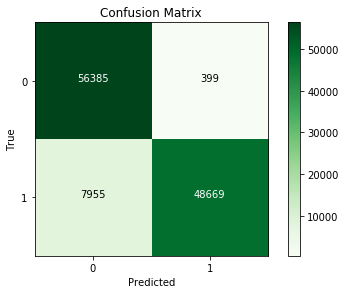

In [183]:
cnf_matrix = confusion_matrix(Y_test_os, y_pred)  
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_LDA_Over.png")
plt.show()

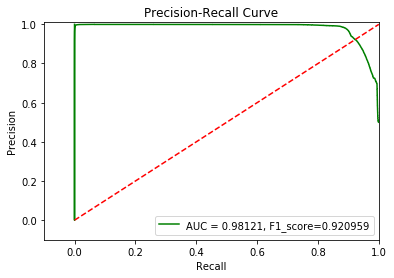

In [184]:
y_pred_prob = clf4 .predict_proba(X_test_os[name_select])[:, 1]
prc_plot(Y_test_os,y_pred,y_pred_prob)

Undersampling：

In [185]:
clf4= discriminant_analysis.LinearDiscriminantAnalysis()
clf4.fit(X_train_us[name_select],Y_train_us)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [186]:
y_pred = clf4.predict(X_test_us[name_select])
print("Test set accuracy score: {:.5f}".format(accuracy_score(Y_test_us, y_pred,)))
y_pred_ = clf4.predict(X_train_us[name_select])
print("Training set accuracy score: {:.5f}".format(accuracy_score(Y_train_us, y_pred_,)))
print("Test set F1 score: {:.5f}".format(f1_score(Y_test_us, y_pred)))
print("Training set F1 score: {:.5f}".format(f1_score(Y_train_us, y_pred_)))
recall = recall_score(Y_test_us, y_pred)
precision = precision_score(Y_test_us, y_pred)
print("Test set recall: {:.5f}, precision:{:.5f}".format(recall,precision))

Test set accuracy score: 0.91020
Training set accuracy score: 0.90193
Test set F1 score: 0.90179
Training set F1 score: 0.88992
Test set recall: 0.82787, precision:0.99020


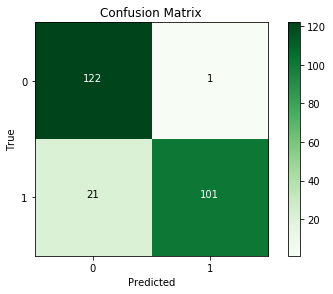

In [187]:
cnf_matrix = confusion_matrix(Y_test_us, y_pred)  
plt.figure()
confusion_matrix_plot(cnf_matrix,labels)
plt.savefig("confusion_matrix_LDA_Under.png")
plt.show()

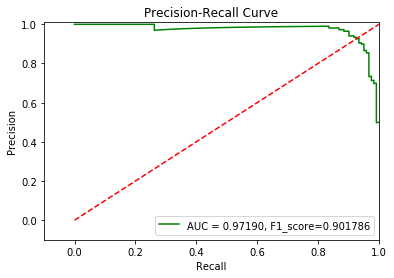

In [188]:
y_pred_prob = clf4 .predict_proba(X_test_us[name_select])[:, 1]
prc_plot(Y_test_us,y_pred,y_pred_prob)

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Greens) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

# XGBOOST

In [30]:

xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

param_grid = {
            'n_estimators': [50, 100, 150, 200]
              }

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train_os[name_select], Y_train_os)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

/Users/anupamgupta/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  16.9s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s


[CV] .................................. n_estimators=50, total=  18.6s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  18.1s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  35.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  35.8s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  35.8s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=  52.3s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=  52.3s
[CV] n_estimators=150 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.9min finished


The best parameters for using this model is {'n_estimators': 200}


In [31]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, 
                            n_estimators = 200)

xgb_cfl.fit(X_train_os[name_select], Y_train_os)
y_pred = xgb_cfl.predict(X_test_os[name_select])
y_score = xgb_cfl.predict_proba(X_test_os[name_select])[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(Y_test_os, y_pred)
class_names = [0,1]
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

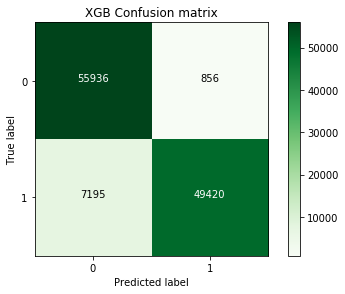

Precision =     0.983
Recall    =     0.873
F1_score  =     0.925


In [34]:
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'XGB Confusion matrix')
plt.savefig('confusion_matrix_LDA_Under.png')
plt.show()

show_metrics()

In [35]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

param_grid = {
            'n_estimators': [50, 100, 150, 200]
              }

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train_us[name_select], Y_train_us)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

/Users/anupamgupta/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.1s
[CV] n_estimators=150 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.8s finished


In [36]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, 
                            n_estimators = 100)

xgb_cfl.fit(X_train_us[name_select], Y_train_us)
y_pred = xgb_cfl.predict(X_test_us[name_select])
y_score = xgb_cfl.predict_proba(X_test_us[name_select])[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(Y_test_us, y_pred)
class_names = [0,1]
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

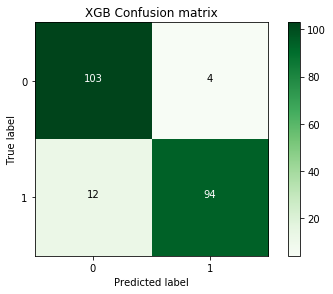

Precision =     0.959
Recall    =     0.887
F1_score  =     0.922


In [37]:
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'XGB Confusion matrix')
plt.savefig('confusion_matrix_LDA_Under.png')
plt.show()

show_metrics()

# SVM

# Tuning hyper-parameters for recall

Best parameters set found on Training dataset:

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on Training dataset:

0.929 (+/-0.025) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.741 (+/-0.048) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.902 (+/-0.033) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.945 (+/-0.023) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.809 (+/-0.056) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.927 (+/-0.027) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.596 (+/-0.033) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.945 (+/-0.021) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.896 (+/-0.041) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.945 (+/-0.023) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.619 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.943 (+/-0.013) for {'C': 1000, 'gamma': 0.001, 'ker

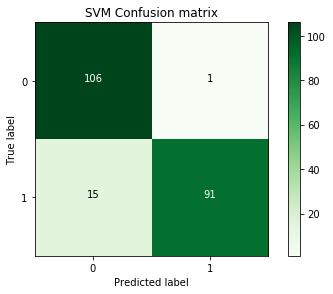

In [38]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf','poly'], 'gamma': [1e-3,  1e-4], 'C': [1,10,100,1000]}]
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    svm = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    svm.fit(X_train_us[name_select], Y_train_us)

    print("Best parameters set found on Training dataset:")
    print()
    print(svm.best_params_)
    print()
    print("Grid scores on Training dataset:")
    print()
    means = svm.cv_results_['mean_test_score']
    stds = svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true_test_svm, y_pred_test_svm = Y_test_us, svm.predict(X_test_us[name_select])
    print(classification_report(y_true_test_svm, y_pred_test_svm))
    print()
    cm = confusion_matrix(y_true_test_svm, y_pred_test_svm)
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'SVM Confusion matrix')
    plt.savefig('confusion_matrix_LDA_Under.png')
    plt.show()

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    svm = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    svm.fit(X_train_os[name_select], Y_train_os)

    print("Best parameters set found on Training dataset:")
    print()
    print(svm.best_params_)
    print()
    print("Grid scores on Training dataset:")
    print()
    means = svm.cv_results_['mean_test_score']
    stds = svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true_test_svm, y_pred_test_svm = Y_test_os, svm.predict(X_test_os[name_select])
    print(classification_report(y_true_test_svm, y_pred_test_svm))
    print()

# Tuning hyper-parameters for recall

